# **Análisis espectral**
## Procesamiento de Imagen y Señal
### **ESCRIBE TU NOMBRE AQUI**
### Curso 2024-2025

In [2]:
import os
import sys

import math
import cmath

##

import warnings
warnings.filterwarnings('ignore')

##

import numpy as np

import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm
from matplotlib import pyplot
import matplotlib.image as im

from scipy import signal, fftpack, interpolate
from scipy.fft import fft, ifft
from scipy.signal import chirp, spectrogram
import scipy.signal.windows as windows

from skimage import io

import IPython.display as ipd
import librosa
import librosa.display

import soundfile as sf

from pydub import AudioSegment

#### Important tips
# To hear the signal
# ipd.Audio(x, rate=fs)
####

from operator import itemgetter

In [ ]:
# Funciones auxiliares
path = "code/"

# Add the directory containing your module to the Python path (wants absolute paths)
sys.path.append(os.path.abspath(path))

from f_plot import *
from f_get_random import *

from f_audio_player_list import *

---

# **Espectro de una señal**

1. ***Espectro de una sinusoide compuesta por dos sinusoides simples*** 

   Genera una sinusoide compuesta con $t \in [-2\pi,2\pi]$. 

   $$x(t) = 0.5 \cdot sin(3t)+0.25 \cdot sin(10t)$$

   Calcula su espectro así como la magnitud del mismo en decibelios tanto para la sinusoide compuesta como para las partes simples. Visualiza también la suma de las magnitudes del espectro de cada parte de la sinusoide.

   Utiliza una frecuencia de muestreo de $800$ Hz.

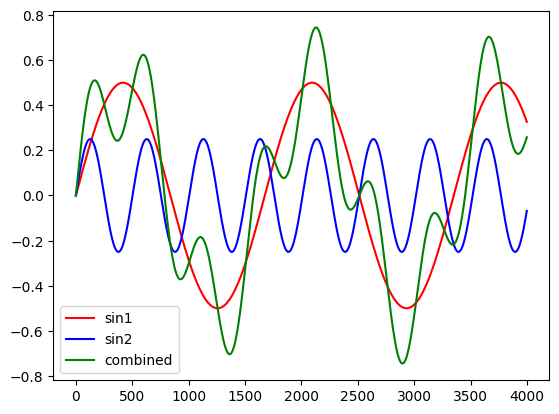

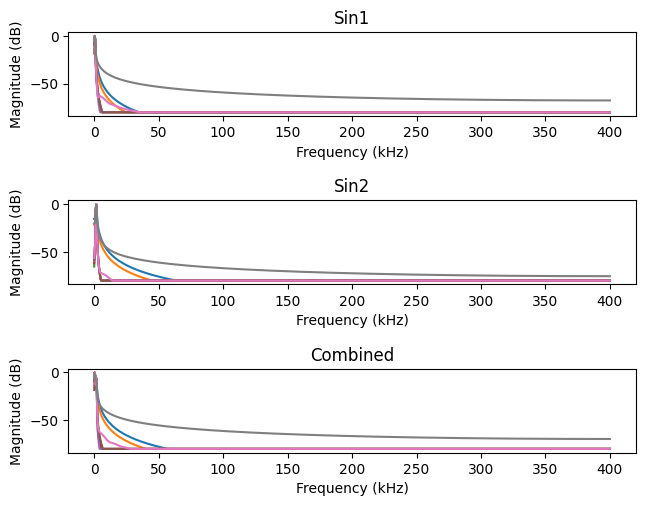

In [43]:
# Generar dos funciones sinusoidales sencillas (por partes)
duracion    = 5         # Duración (en s) de la señal generada
fs          = 800       # Frecuencia de muestreo en Hz
t = np.linspace(0, duracion, int(fs * duracion), endpoint=False)

sin1 = 0.5  * np.sin(3 * t)
sin2 = 0.25 * np.sin(10 * t)

# Combinación de las dos funciones
x = sin1 + sin2

# Transformada de Fourier de las funciones y de la función combinada. 
sin1_fft    = librosa.stft(sin1)
sin2_fft    = librosa.stft(sin2)
x_fft       = librosa.stft(x)

def plot_signal_spectrums(signal_ffts, sampling_rates, labels):
    """
    Plotea el espectro de una señal dada la señal y su frecuencia de muestreo.
    
    Parameters:
        signal (numpy array): La señal en el dominio del tiempo.
        sampling_rate (float): Frecuencia de muestreo en Hz.
    """
    f, axs = plt.subplots(len(signal_ffts))
    f.tight_layout()
    for ax, fft_values, fs, label in zip(axs, signal_ffts, sampling_rates, labels):
        f = np.linspace(0, fs/2, num=len(fft_values))
        D = librosa.amplitude_to_db(np.abs(fft_values), ref=np.max)
        ax.plot(f, D)
        ax.set_title(label)
        ax.set_xlabel('Frequency (kHz)')
        ax.set_ylabel('Magnitude (dB)')
    plt.subplots_adjust(hspace=1.0) 

# Visualización
plt.plot(sin1, color = "red",   label = "sin1")
plt.plot(sin2, color = "blue",  label = "sin2")
plt.plot(x, color = "green",    label = "combined")
plt.legend()
plt.show()

# Magnitud y magnitud en decibelios
plot_signal_spectrums( [sin1_fft, sin2_fft, x_fft], [fs, fs, fs], ["Sin1", "Sin2", "Combined"])



<hr style="border: 1px solid green" />


2. Visualiza algunas muestras de la señal de audio, su espectro y su espectrograma:
    1. seno (`audio/sinewave.wav`)
    2. sirena (`audio/sirena.wav`)

Oye la señal pero con cuidado ya que puede ser un sonido muy agudo.

In [ ]:
# Selecciona aleatoriamente uno de los dos audios
seleccionada = get_random_number([1, 2])
print(seleccionada)

In [ ]:
# Lee y oye la señal. Visualiza su espectro.

<hr style="border: 1px solid green" />

3. ***Espectro de una sinusoide con relleno (*Zero-padding*)*** 

    Genera una sinusoide compuesta rellenada con ceros al final de la señal. Visualiza la señal, la señal rellenada, el espectro de la señal original y el espectro de la señal rellenada.

    $$x(t) = cos(2 \pi f_{1} t) + sin(2 \pi f_{2} t)$$

    donde la frecuencia de muestreo es de $1000$ Hz, la duración de la señal es de $256$ muestras y las frecuencias son: $f_{1}=50$ y $f_{2}=101.5$

In [ ]:
# Función sinusoidal compuesta

# Transformada

# Zero-padding (1024 muestras)

# Visualización de la sinusoide

# Visualización de la transformada

# Visualización de la sinusoide rellenada (Zero-padding de 1024 muestras)

<hr style="border: 1px solid green" />

4. **Espectro de una sinusoide no tan simple**

    Genera una sinusoide:

    $$x(t)=A \cos(2 \pi f \cdot t + \phi)$$

    donde : 
    * Duración: $N = 64$
    * Amplitud y fase de la sinusoide: $A=1$ y $\phi=0$
    * Frecuencia base ($f_{base}$) : Elige la frecuencia base que desees $\in [0, 1]$
    * Frecuencia de muestreo variable: $f = f_{base} + \frac{1}{2N}$ ciclos/muestra

    Calcula su espectro y la magnitud del espectro en decibelios. Realiza el mismo estudio con la sinusoide rellenada con ceros al final de la señal (*zero padding*) con factor de relleno = $8$.

In [ ]:
# Realiza la tarea

<hr style="border: 1px solid green" />

5. **Espectros de señales sinusoidales**

    Genera dos señales sinusoidales con frecuencia de muestreo de 8000Hz con una duración de 2 segundos. Obtén los espectros de ambas señales.

    $$s_{1} = \frac{1}{6} \sin(880 \pi \cdot t) + \frac{1}{15} \sin(1760\pi \cdot t)$$

    $$s_{2} = \frac{1}{6} \sin(16880\pi \cdot t) - \frac{1}{15} \sin(14240 \pi \cdot t)$$

    ¿ Qué puedes decir sobre ambas señales una vez vistos sus espectros ? **ESCRIBE AQUÍ TU RESPUESTA**

In [ ]:
# Realiza la tarea

---

# **Espectro de una señal con ruido**

6. **Espectro de una señal contaminada con ruido**
  
    Mediante la transformada de Fourier encuentra los componentes frecuenciales de una señal contaminada con ruido blanco, $ruido_t ~\sim N(0,\sigma^2)=N(0, 4)$.

    $$x(t)=0.7sin(2\pi 50t) + sin(2\pi 120t)+ruido_t$$

    La frecuencia de muestreo a utilizar es $1000$ Hz.

In [ ]:
# Función original

# Función con ruido blanco de media 0 y varianza 4

# Magnitud espectral (señal original sin ruido)

# Magnitud espectral (señal con ruido)

# Gráfico Final: Función original, función con ruido, magnitud espectral de la señal original y magnitud espectral de la señal con ruido

<hr style="border: 1px solid green" />

7. **Eliminación del ruido de una señal sinusoidal**

    Generamos una señal aleatoria ruidosa de tipo multiespectral (tres frecuencias: $f1$, $f2$ y $f3$ Hz) de 2 segundos con una frecuencia de muestreo:
    1. $fs = 1234$ Hz y frecuencias $(f1, f2, f3) = (12, 18, 30)$
    2. $fs = 1000$ Hz y frecuencias $(f1, f2, f3) = (50, 120, 160)$
        
    + Selecciona aleatoriamente una de las dos funciones.
    + Obtén su espectro y a partir del mismo reconstruimos la señal.
    + Visualiza la señal original y la señal reconstruida.

In [ ]:
# Selecciona aleatoriamente una de las dos funciones
seleccionada = get_random_number([1, 2])
print(seleccionada)

<hr style="border: 1px solid green" />

8. **Eliminación del ruido de una imagen**

    Elimina el ruido de una imagen RGB (`images_RGB_channels/dog.jpg`) a partir del espectro de la misma.
    + Pasamos a escala de grises y le añadimos ruido a la imagen.
    + Obtenemos su espectro y a partir del mismo reconstruimos la imagen.
    + Visualiza la imagen original con ruido y la imagen reconstruida.

In [ ]:
# Realiza la tarea

---

# **Ventanas**

9. Genera una ventana y utilízala para obtener el espectro de una señal sinusoidal. Visualiza la ventana, la señal, la magnitud espectral de ambas señales y la magnitud espectral en decibelios.

    $$x(t) = Acos(2\pi f \cdot t + \phi)$$

    Ten en cuenta los datos siguientes: 
    * Tipo de ventana: El tipo de ventana que desees
    * Tamaño de la ventana: El tamaño de ventana que desees
    * Frecuencia de muestreo : $fs=128$
    * Amplitud y fase de la sinusoide: $A=1$ y $\phi=0$
    * Frecuencia base: La frecuencia que desees ($f$)

In [ ]:
# Genera la ventana

# Genera la señal

# Aplica la ventana a la señal

# Visualiza la ventana, la señal, la señal operada con la ventana y laa magnitud espectrales de las tres señales (señal, ventana y señal-ventana)

---

# **Efectos de audio**

10. Visualiza los espectros de los efectos de audio de:
   
  


In [ ]:
# Lee los audios (reverberación, flanger, chorus, phaser) de uno de los dos instrumentos: guitarra o percusión
# Visualiza el oscilograma y el espectrograma de todos los audios
# Oye todos los audios

In [ ]:
# Todas
n_folder ="audio_effects"
audios = get_audios_path(n_folder)
print(audios)

In [ ]:
# Realiza la tarea

---

# **Referencias**

**@Dixon2001** Dixon, S. (2001). Learning to detect onsets of acoustic piano tones. Proceedings of the Workshop on Current Directions in Computer Music Research

**@Klapuri1999** Klapuri, A. P. (1999). Sound onset detection by applying psychoacoustic knowledge. Proceedings of the IEEE International Conference on Acoustics, Speech and Signal Processing

**@Klapuri2006** Klapuri, A. and Davy, M. (2006). Signal Processing Methods for Music Transcription. Springer, 1st edition

[**Mathematics of the DFT with audio applications**](http://www.dsprelated.com/freebooks/mdft/)

[**Spectral Audio Signal Processing**](http://www.dsprelated.com/freebooks/sasp/)

[**Demos**](http://pages.jh.edu/~signals/)